---
<center> <h1> Similarité cosinus dans le contexte de TAL BEDIA JULIEN</h1> </center>

---

## Sujet

Nous avons vu deux méthodes de construction de vecteurs pour représenter des documents textuels. La prochaine question qui se pose est la suivante :

- Comment mesurer la similarité ou la dissemblance des documents textuels et comment exploiter les vecteurs construits jusqu'à présent pour trouver une solution à ce problème ?

<center>

![Cosinus](cosinus_query_document.png)
</center>

Si les mots utilisés dans deux documents sont similaires, cela signifie que les documents sont également similaires. Dans cette section, nous allons étudier la similarité cosinus et l'utiliser pour déterminer la similarité des documents sur la base de leur représentation vectorielle.

La similarité cosinus permet de comprendre l'angle entre deux vecteurs. Deux vecteurs sont similaires s'ils sont assez proches en termes de direction. Nous utiliserons les techniques développées dans les séances précédentes pour construire ces vecteurs, puis nous déterminerons à quel point ils sont proches ou éloignés l'un de l'autre en utilisant la similarité cosinus.

La similarité cosinus permet de mesurer le cosinus de l'angle entre deux vecteurs. La valeur de la similarité cosinus est comprise entre -1 et +1. La valeur +1 indique que les vecteurs sont parfaitement similaires, et la valeur -1 indique que les vecteurs sont parfaitement dissemblables ou exactement opposés l'un à l'autre. Comme vous pouvez le comprendre, deux documents sont similaires si leurs valeurs de similarité cosinus sont proches de +1. En outre, ces mesures de similarité s'appliquent toujours à des paires de documents. La similarité cosinus ne peut être calculée que pour des vecteurs de même taille. La formule de la similarité en cosinus pour deux vecteurs $A$ et $B$ est la suivante :

<center> 

$ cos(\theta) = \frac{A.B}{||A||||B||} $ 

</center>



Ici, $A.B$ est le produit scalaire entre les deux vecteurs, et $||A||$ et $||B||$ représentent respectivement la magnitude (ou norme) de ces deux vecteurs. La formule précédente peut également être représentée comme suit :

<center>  

$  cos(\theta) = \frac{A.B}{\sqrt{\sum_{i=1}^{i=N}{a_i^2}} \sqrt{\sum_{i=1}^{i=N}{b_i^2}} } $ 

</center>


Ici, $a_i$ et $b_i$ représentent les valeurs des vecteurs $A$ et $B$ le long de la $i$-ème dimension respectivement dans un espace à $N$ dimensions. 


## Compétences visées

- Découvrir les différentes formes que peuvent revétir un chatbot

## Création d'un corpus de phrases

Choisissez 6 phrases que vous souhaitez en français ou en anglais. Trois phrases parlent de la même thématique (par exemple, le médical) et les trois autres parlent d'une autre thématique commune. Ces six phrases constituent votre corpus  


In [4]:
medical = [
    'Antibiotics are often prescribed to treat bacterial infections.',
    'Vaccination is an effective way to prevent certain infectious diseases.',
    'Symptoms of the flu include fever, body aches, and persistent cough.'
]
alimentaire = [
    'Fruits and vegetables are rich in nutrients and help maintain a balanced diet.',
    'Excessive consumption of sugar can increase the risk of developing diseases such as diabetes.',
    'Foods high in fat can contribute to obesity and other health problems.'
]

## Pipeline de prétraitement des données

Développez une fonction permettant d'effectuer toutes les tâches de prétraitement (nettoyage(DIGIT, URL...), racinisation, lemmatisation, suppression des mots vides, etc.). Un utilisateur doit pouvoir activer seulement les tâches qui l'intéressent. 

In [2]:
import re
import spacy
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('english')
# Charger le modèle 'en' pour la langue anglaise
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Julien\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def preprocess(text, strip=True, lowercase=True, cleaning_digit_url=True, remove_stopwords=True, tokenization=True):

    if strip:
        # strip
        text = text.strip()

    if lowercase:
        # minuscule
        text = text.lower()

    if cleaning_digit_url:
        # Expression régulière pour identifier les URLs
        url_regex = r'http\S+'
        text = re.sub(url_regex, "URL", text)

        # Expression régulière pour identifier les chiffres
        digit_regex = r'\d+'
        text = re.sub(digit_regex, "DIGIT", text)

        # Expression régulière pour identifier les users
        user_regex = r'@\S+'
        text = re.sub(user_regex, "USER", text)

    if remove_stopwords:
        # suppression des mots vides
        filtered_words = [word for word in text.split() if word.lower() not in stop_words]
        text = ' '.join(filtered_words)

    if tokenization:
        # racinisation et lemmatisation
        nlp_output = nlp(text)
    
    return nlp_output

print(preprocess(medical[0]))

antibiotics often prescribed treat bacterial infections.


## Codez la fonction de similarité cosinus

La similarité cosinus permet de mesurer le cosinus de l'angle entre deux vecteurs. La valeur de la similarité cosinus est comprise entre -1 et +1. La valeur +1 indique que les vecteurs sont parfaitement similaires, et la valeur -1 indique que les vecteurs sont parfaitement dissemblables ou exactement opposés l'un à l'autre. Comme vous pouvez le comprendre, deux documents sont similaires si leurs valeurs de similarité cosinus sont proches de +1. En outre, ces mesures de similarité s'appliquent toujours à des paires de documents. La similarité cosinus ne peut être calculée que pour des vecteurs de même taille.

In [6]:
import math

def cosine_similarity(token1, token2):

    # transformer les tokens en vecteurs
    vector1 = {x: token1.count(x) for x in set(token1)}
    vector2 = {x: token2.count(x) for x in set(token2)}
    
    # calculer le produit scalaire
    dot_product = sum(vector1[x] * vector2[x] for x in vector1 if x in vector2)
    
    # calculer la magnitude de chaque vecteur
    magnitude1 = math.sqrt(sum(vector1[x] ** 2 for x in vector1))
    magnitude2 = math.sqrt(sum(vector2[x] ** 2 for x in vector2))
    
    # calculer la similarité cosinus
    cosine_sim = dot_product / (magnitude1 * magnitude2)
    
    return cosine_sim


print(cosine_similarity(preprocess(medical[2]).text, preprocess(medical[1]).text))



0.8244190863785854


## Calculez le sac de mots du corpus

In [7]:
from collections import Counter

corpus = medical + alimentaire

sac_words = Counter()
for sentence in corpus:
    words = sentence.split()
    sac_words.update(words)

print(sac_words)

Counter({'and': 4, 'to': 3, 'of': 3, 'are': 2, 'the': 2, 'in': 2, 'can': 2, 'Antibiotics': 1, 'often': 1, 'prescribed': 1, 'treat': 1, 'bacterial': 1, 'infections.': 1, 'Vaccination': 1, 'is': 1, 'an': 1, 'effective': 1, 'way': 1, 'prevent': 1, 'certain': 1, 'infectious': 1, 'diseases.': 1, 'Symptoms': 1, 'flu': 1, 'include': 1, 'fever,': 1, 'body': 1, 'aches,': 1, 'persistent': 1, 'cough.': 1, 'Fruits': 1, 'vegetables': 1, 'rich': 1, 'nutrients': 1, 'help': 1, 'maintain': 1, 'a': 1, 'balanced': 1, 'diet.': 1, 'Excessive': 1, 'consumption': 1, 'sugar': 1, 'increase': 1, 'risk': 1, 'developing': 1, 'diseases': 1, 'such': 1, 'as': 1, 'diabetes.': 1, 'Foods': 1, 'high': 1, 'fat': 1, 'contribute': 1, 'obesity': 1, 'other': 1, 'health': 1, 'problems.': 1})


## Calculez la similarité cosinus entre toutes les paires de phrases du corpus en utilisant le sac de mots calculé. 

In [7]:
import math

def cosine_similarity(token1, token2):

    # transformer les tokens en vecteurs
    vector1 = {x: token1.count(x) for x in set(token1)}
    vector2 = {x: token2.count(x) for x in set(token2)}
    
    # calculer le produit scalaire
    dot_product = sum(vector1[x] * vector2[x] for x in vector1 if x in vector2)
    
    # calculer la magnitude de chaque vecteur
    magnitude1 = math.sqrt(sum(vector1[x] ** 2 for x in vector1))
    magnitude2 = math.sqrt(sum(vector2[x] ** 2 for x in vector2))
    
    # calculer la similarité cosinus
    cosine_sim = dot_product / (magnitude1 * magnitude2)
    
    return cosine_sim

corpus = medical + alimentaire

for i in range(len(corpus)):
    for j in range(i+1, len(corpus)):
        similarity_score = cosine_similarity(preprocess(corpus[i]).text, preprocess(corpus[j]).text)
        print(
            f"Similarité entre phrase {i+1} phrase {j+1} est : {similarity_score}")


Similarité entre phrase 1 phrase 2 est : 0.9240193617942865
Similarité entre phrase 1 phrase 3 est : 0.7846672183859986
Similarité entre phrase 1 phrase 4 est : 0.9231555985818445
Similarité entre phrase 1 phrase 5 est : 0.8240762562684527
Similarité entre phrase 1 phrase 6 est : 0.8403851200627007
Similarité entre phrase 2 phrase 3 est : 0.8244190863785854
Similarité entre phrase 2 phrase 4 est : 0.9119375819025141
Similarité entre phrase 2 phrase 5 est : 0.8913847145509861
Similarité entre phrase 2 phrase 6 est : 0.7574409203664897
Similarité entre phrase 3 phrase 4 est : 0.8408201303452935
Similarité entre phrase 3 phrase 5 est : 0.8703714197937948
Similarité entre phrase 3 phrase 6 est : 0.8787760582097436
Similarité entre phrase 4 phrase 5 est : 0.8577014384058856
Similarité entre phrase 4 phrase 6 est : 0.8355389901182093
Similarité entre phrase 5 phrase 6 est : 0.7510236095106758


## Calculez les vecteurs tf-idf du corpus

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = medical + alimentaire

vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(corpus)

print(tf_idf_matrix.shape)

(6, 55)


## Calculez la similarité cosinus entre toutes les paires de phrases du corpus en utilisant la représenation tf-idf calculée. 

In [9]:
similarity_matrix = cosine_similarity(tf_idf_matrix)

print(similarity_matrix)

[[1.         0.05924445 0.         0.07492542 0.         0.05583517]
 [0.05924445 1.         0.         0.         0.06003726 0.04935848]
 [0.         0.         1.         0.09113359 0.17383856 0.04763934]
 [0.07492542 0.         0.09113359 1.         0.         0.15141149]
 [0.         0.06003726 0.17383856 0.         1.         0.05658237]
 [0.05583517 0.04935848 0.04763934 0.15141149 0.05658237 1.        ]]


## Question obligatoire : Appliquer la similarité cosinus sur les tweets airlines et afficher une heatmap du résultat.

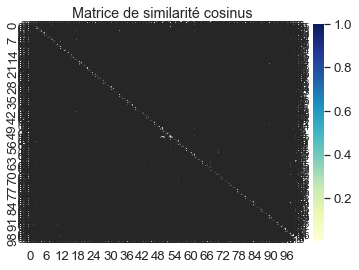

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S -0800')

tweets = pd.read_csv('airline_tweets.csv', encoding='utf-8', parse_dates=['tweet_created'], date_parser=dateparse)

# Récupère que 100 tweets pour des soucis de performances
corpus_tweet = tweets['text'].tolist()[:100]

# Applique la fonction de preprocess sur chaque tweet
corpus_token = [preprocess(tweet).text for tweet in corpus_tweet ]

# On applique la similarité cosinus de tdif pour de meilleur résultat
tf_idf_matrix = vectorizer.fit_transform(corpus_token)
similarity_matrix = cosine_similarity(tf_idf_matrix)

#print(similarity_matrix)

# Créer une heatmap avec seaborn
sns.set(font_scale=1.2)
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu")

# Ajouter le titre
plt.title("Matrice de similarité cosinus")

# Afficher la heatmap
plt.show()